### Regularization
What is Overfitting? (very simple words)

Overfitting means:

Your model learns too much from training data, including noise and random patterns.

It looks very smart on training data but very dumb on new/unseen data.

🔹 Example (Non-technical)

Imagine you are preparing for an exam:

You memorize answers to all the practice questions (training data).

In the real exam (test data), the questions are slightly different.

You fail because you didn’t learn the concepts, you just memorized.

This is overfitting.

🔹 Visual Example

Underfitting → draws a straight line that misses many points.

Overfitting → draws a zig-zag line passing through every point.

Good fit → smooth curve that captures the overall trend.

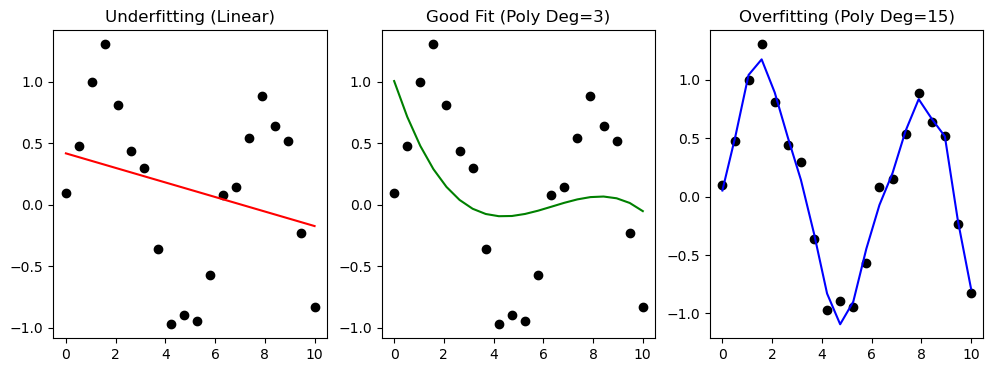

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate some data (y = sin(x) + noise)
np.random.seed(42)
X = np.linspace(0, 10, 20).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

# 1. Underfitting (Linear model)
model1 = LinearRegression()
model1.fit(X, y)
y_pred1 = model1.predict(X)

# 2. Good fit (Polynomial degree=3)
poly3 = PolynomialFeatures(degree=3)
X_poly3 = poly3.fit_transform(X)
model2 = LinearRegression()
model2.fit(X_poly3, y)
y_pred2 = model2.predict(X_poly3)

# 3. Overfitting (Polynomial degree=15)
poly15 = PolynomialFeatures(degree=15)
X_poly15 = poly15.fit_transform(X)
model3 = LinearRegression()
model3.fit(X_poly15, y)
y_pred3 = model3.predict(X_poly15)

# Plot
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(X, y, color="black")
plt.plot(X, y_pred1, color="red")
plt.title("Underfitting (Linear)")

plt.subplot(1, 3, 2)
plt.scatter(X, y, color="black")
plt.plot(X, y_pred2, color="green")
plt.title("Good Fit (Poly Deg=3)")

plt.subplot(1, 3, 3)
plt.scatter(X, y, color="black")
plt.plot(X, y_pred3, color="blue")
plt.title("Overfitting (Poly Deg=15)")

plt.show()


### First, why “regularization”?

Regularization is like a penalty we add to the model to control its complexity.

It prevents the model from becoming too complicated (overfitting).

Think of it like a teacher warning:

“Don’t write too much in the exam. Keep your answers short and focused.”

### 🔹 L1 (Lasso) Regularization

Adds a penalty = sum of absolute values of coefficients.

Effect: pushes some coefficients to exactly 0.

Result: does feature selection (removes unimportant features).

👉 Example:
If we are predicting house price, and “color of door” is useless, Lasso will make its weight 0 → ignore it.

### 🔹 L2 (Ridge) Regularization

Adds a penalty = sum of squares of coefficients.

Effect: shrinks coefficients, but never makes them exactly 0.

Result: keeps all features, but makes their influence smaller.

👉 Example:
For house price, even if “color of door” is not very useful, Ridge will give it a tiny weight instead of removing it.

🔹 Key Difference

Regularization	Formula (penalty)	Effect

L1 (Lasso)	Sum of |weights|	Makes some weights 0 (feature selection)


L2 (Ridge)	Sum of (weights²)	Shrinks weights but keeps all features


Analogy

Imagine you are packing for a trip:

L1 (Lasso): You throw away items you don’t need → lighter bag.

L2 (Ridge): You keep everything but make each item smaller → bag is still heavy, but controlled.

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Fake dataset: House price prediction
np.random.seed(42)
X = np.random.randn(100, 5)  # 5 features
y = 3*X[:,0] + 2*X[:,1] + np.random.randn(100)  # Only first 2 features matter

# Split into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Normal Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# 2. Ridge Regression (L2)
ridge = Ridge(alpha=1.0)  # alpha = penalty strength
ridge.fit(X_train, y_train)

# 3. Lasso Regression (L1)
lasso = Lasso(alpha=0.1)  # smaller alpha = less penalty
lasso.fit(X_train, y_train)

# Check coefficients
print("Linear Regression Coefficients:", lr.coef_)
print("Ridge Coefficients:", ridge.coef_)
print("Lasso Coefficients:", lasso.coef_)

# Compare test accuracy
print("\nTest MSE (Linear):", mean_squared_error(y_test, lr.predict(X_test)))
print("Test MSE (Ridge):", mean_squared_error(y_test, ridge.predict(X_test)))
print("Test MSE (Lasso):", mean_squared_error(y_test, lasso.predict(X_test)))


Linear Regression Coefficients: [3.0815604  2.06579999 0.03413858 0.04249737 0.00478706]
Ridge Coefficients: [ 3.02026900e+00  2.02896741e+00  3.62880577e-02  4.25242457e-02
 -1.62351505e-03]
Lasso Coefficients: [ 2.93572326  1.95006125  0.          0.         -0.        ]

Test MSE (Linear): 0.808904829341592
Test MSE (Ridge): 0.8118920668930031
Test MSE (Lasso): 0.8680839181647836
